# Investigate the ratings of Fandago


## 1. Read in the rating data before and after Hickey's analysis

In [1]:
import pandas as pd
import numpy as np
before = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

In [2]:
before.head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
after.head(5)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [4]:
# select only relevant columns from each file
columns_b4 = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']
columns_af = ['movie', 'year', 'fandango']
before = before[columns_b4]
after = after[columns_af]


In [5]:
before.head(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [6]:
after.head(5)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [7]:
# data released in 2015 and 2016, respectively
print(before['FILM'].head(5))
# need to separate year from film name in the before file
before['year'] = before['FILM'].str.replace('(',' ').str.replace(')','').str.rsplit(n=1,expand=True)[1].astype(int)
before['movie'] = before['FILM'].str.replace('(',' ').str.replace(')','').str.rsplit(n=1,expand=True)[0]
print(before['year'].head(5))
print(before['movie'].head(5))

0    Avengers: Age of Ultron (2015)
1                 Cinderella (2015)
2                    Ant-Man (2015)
3            Do You Believe? (2015)
4     Hot Tub Time Machine 2 (2015)
Name: FILM, dtype: object
0    2015
1    2015
2    2015
3    2015
4    2015
Name: year, dtype: int64
0    Avengers: Age of Ultron
1                 Cinderella
2                    Ant-Man
3            Do You Believe?
4     Hot Tub Time Machine 2
Name: movie, dtype: object


In [8]:
film2015 = before[before['year']==2015]
film2016 = after[after['year']==2016]
print(film2015.head(5))
print(film2016.head(5))

                             FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   
3          Do You Believe? (2015)             5.0                   4.5   
4   Hot Tub Time Machine 2 (2015)             3.5                   3.0   

   Fandango_votes  Fandango_Difference  year                    movie  
0           14846                  0.5  2015  Avengers: Age of Ultron  
1           12640                  0.5  2015               Cinderella  
2           12055                  0.5  2015                  Ant-Man  
3            1793                  0.5  2015          Do You Believe?  
4            1021                  0.5  2015   Hot Tub Time Machine 2  
                     movie  year  fandango
0      10 Cloverfield Lane  2016       3.5
1                 13 Hours  201

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

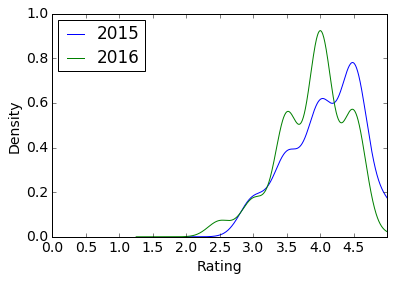

In [10]:
fig = plt.figure()
film2015['Fandango_Stars'].plot.kde(label='2015', legend=True)
film2016['fandango'].plot.kde(label='2016', legend=True)
plt.legend(loc='upper left')
plt.xlim(0,5)
plt.xlabel('Rating')
plt.xticks(np.arange(0,5,0.5))
plt.style.use('fivethirtyeight')

### By analyzing the rating distribution of the 2015 and 2016 movies, it does seem like Fandango has changed their rating scheme, as the 2016 movies rate relatively lower than 2015. 

In [11]:
film2015.shape

(129, 7)

In [12]:
film2016.shape

(191, 3)

### 2016 movies are more than 2015 movies, 191 vs. 129. Need to look at normalized distribution (percentage) of each rating.

In [13]:
film2015['Fandango_Stars'].value_counts(normalize=True).sort_index(ascending=False)*100

5.0     6.976744
4.5    37.984496
4.0    28.682171
3.5    17.829457
3.0     8.527132
Name: Fandango_Stars, dtype: float64

In [14]:
film2016['fandango'].value_counts(normalize=True).sort_index(ascending=False)*100

5.0     0.523560
4.5    24.607330
4.0    40.314136
3.5    24.083770
3.0     7.329843
2.5     3.141361
Name: fandango, dtype: float64

### Again, 2016 movies have a general lower rating than 2015 movies. 

In [15]:
film2015['Fandango_Stars'].describe()

count    129.000000
mean       4.085271
std        0.538096
min        3.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: Fandango_Stars, dtype: float64

In [16]:
film2016['fandango'].describe()

count    191.000000
mean       3.887435
std        0.509540
min        2.500000
25%        3.500000
50%        4.000000
75%        4.250000
max        5.000000
Name: fandango, dtype: float64

In [17]:
print(film2015['Fandango_Stars'].mode())
print(film2016['fandango'].mode())

0    4.5
dtype: float64
0    4.0
dtype: float64


### mean and mode are descreasing from 2015 to 2016. Median remains a rating of 4

In [29]:
statistics = pd.DataFrame(columns=['mean', 'median', 'mode'])
statistics['mean'] = pd.Series([film2015['Fandango_Stars'].describe()['mean'], film2016['fandango'].describe()['mean']], index=[2015,2016])
statistics['median'] = pd.Series([film2015['Fandango_Stars'].describe()['50%'], film2016['fandango'].describe()['50%']], index=[2015,2016])
statistics['mode'] = pd.Series([film2015['Fandango_Stars'].mode()[0], film2016['fandango'].mode()[0]], index=[2015,2016])
statistics

,mean,median,mode
2015,4.085271,4.0,4.5
2016,3.887435,4.0,4.0


In [36]:
statistics.T.iloc[:,0]

mean      4.085271
median    4.000000
mode      4.500000
Name: 2015, dtype: float64

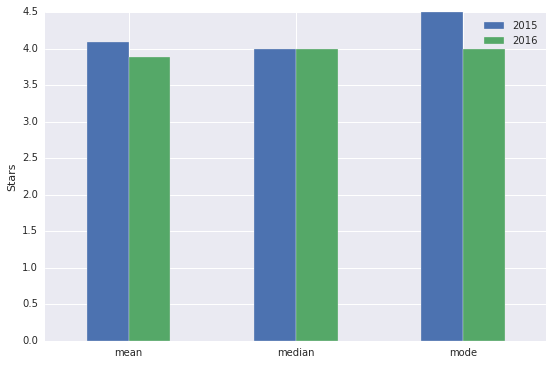

In [58]:
ax = statistics.T.plot.bar(rot=0)
plt.legend()
plt.ylabel('Stars')